<a href="https://colab.research.google.com/github/WittmannF/course-v4/blob/master/book-notes/ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Let's first download a utility file for setting up Google Colab
!wget https://raw.githubusercontent.com/WittmannF/course-v4/master/utils/colab_utils.py

from colab_utils import setup_fastai_colab
setup_fastai_colab()

--2020-08-28 17:30:35--  https://raw.githubusercontent.com/WittmannF/course-v4/master/utils/colab_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1426 (1.4K) [text/plain]
Saving to: ‘colab_utils.py’

colab_utils.py      100%[===================>]   1.39K  --.-KB/s    in 0s      

2020-08-28 17:30:36 (24.5 MB/s) - ‘colab_utils.py’ saved [1426/1426]

    NOTE: For debugging and visualizing stdout, please run:
    from colab_utils import *
    !{REQUIREMENTS_PIP}
    !{GIT_CLONE_REPOSITORY}
    %cd {FASTAI_NB_PATH}

Installing requirements...
Done!
Cloning FastAI Repository...
Done!
Opening folder course-v4/nbs/ with nbs and utils files...
Done!
Done!


In [1]:
!pip install fastai2

     |████████████████████████████████| 184kB 4.8MB/s 


In [2]:
from fastai2.vision.all import *

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [5]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=lambda x: x[0].isupper(),
    item_tfms=Resize(224)
)

In [6]:
resnet34

<function torchvision.models.resnet.resnet34>

In [7]:
error_rate

<function fastai2.metrics.error_rate>

In [8]:
error_rate??

In [9]:
accuracy??

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [11]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.161246,0.019734,0.006766,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.071418,0.014700,0.006089,00:52


Now, let me try the very same idea on different datasets. First, let me build a hotdog/nothotdog classifier:

In [12]:
!git clone https://github.com/WittmannF/AutoDL.git

Cloning into 'AutoDL'...
remote: Enumerating objects: 2731, done.
remote: Total 2731 (delta 0), reused 0 (delta 0), pack-reused 2731
Receiving objects: 100% (2731/2731), 58.08 MiB | 40.43 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [13]:
ImageDataLoaders.from_folder?

In [14]:
ls AutoDL/hotdog-not-hotdog/

train/  valid/


In [15]:
get_image_files('AutoDL/hotdog-not-hotdog/')

(#70) [Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/90930.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/90167.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/91432.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/90116.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/89892.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/93961.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/4889.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/1167.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/4781.jpg'),Path('AutoDL/hotdog-not-hotdog/train/not-hotdog/93653.jpg')...]

In [16]:
path = Path('AutoDL/hotdog-not-hotdog/')

In [17]:
dls = ImageDataLoaders.from_folder( 
    path,
    #get_image_files(path),
    seed=42,
    item_tfms=Resize(224)
)

In [18]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [19]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,nan,2.698923,0.600000,00:00


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,nan,2.698923,0.600000,00:00


In [20]:
path = untar_data(URLs.MNIST_TINY)
dls = ImageDataLoaders.from_folder(path)

In [21]:
path

Path('/root/.fastai/data/mnist_tiny')

In [22]:
ls {path}

labels.csv  models/  test/  train/  valid/


In [23]:
ls {path/'train'}

3/  7/


In [24]:
dls = ImageDataLoaders.from_folder('/root/.fastai/data/mnist_tiny/')

In [25]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [26]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.909956,0.281503,0.892704,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.322755,0.200654,0.929900,00:01


In [27]:
ls 'AutoDL/hotdog-not-hotdog/'

train/  valid/


In [28]:
dls = ImageDataLoaders.from_folder('AutoDL/hotdog-not-hotdog/',
                                   item_tfms=Resize(224))

In [29]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [30]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,nan,7.013467,0.500000,00:00


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,nan,7.013467,0.500000,00:00


In [31]:
dls = ImageDataLoaders.from_folder('/root/.fastai/data/mnist_tiny/')
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.952025,0.674834,0.224607,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.372130,0.469991,0.153076,00:01


In [32]:
!git clone https://github.com/WittmannF/ImageDataGenerator-example.git

Cloning into 'ImageDataGenerator-example'...
remote: Enumerating objects: 341, done.
remote: Total 341 (delta 0), reused 0 (delta 0), pack-reused 341
Receiving objects: 100% (341/341), 6.69 MiB | 35.66 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [33]:
dls = ImageDataLoaders.from_folder('/root/.fastai/data/mnist_tiny/')
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.937378,0.343398,0.155937,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.314145,0.169864,0.068670,00:01


In [34]:
ls

AutoDL/  ImageDataGenerator-example/  sample_data/


In [35]:
ls ImageDataGenerator-example/flow_from_directory/

train/  valid/


In [36]:
ls /root/.fastai/data/mnist_tiny/

labels.csv  models/  test/  train/  valid/


In [37]:
dls = ImageDataLoaders.from_folder('./ImageDataGenerator-example/flow_from_directory/',
                                   item_tfms=Resize(224)
                                   )

learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.737455,0.916336,0.718750,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.153191,0.266396,0.875000,00:02


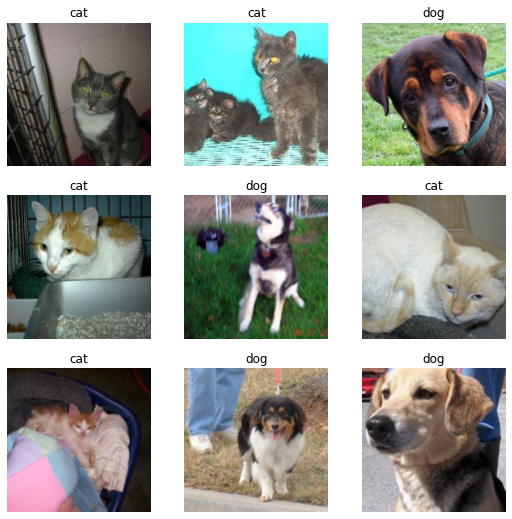

In [38]:
dls.show_batch()

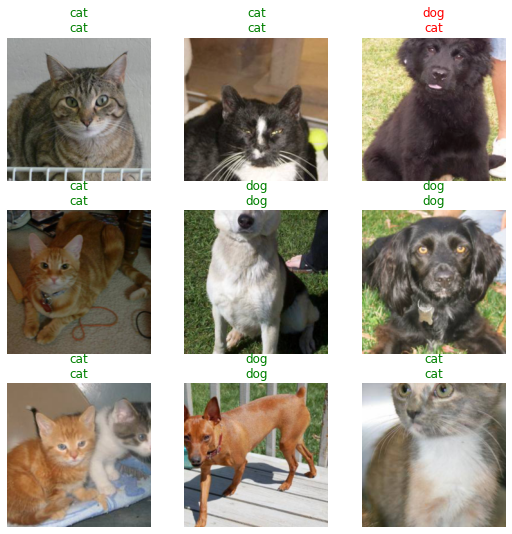

In [39]:
learn.show_results()

In [40]:
learn.show_training_loop()

Start Fit
   - before_fit     : [TrainEvalCallback, Recorder, ProgressCallback]
  Start Epoch Loop
     - before_epoch   : [Recorder, ProgressCallback]
    Start Train
       - before_train   : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - before_batch   : []
         - after_pred     : []
         - after_loss     : []
         - before_backward: []
         - after_backward : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback]
    Start Valid
       - before_validate: [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
      End Batch Loop
    End Valid
     - after_cancel_validate: [Recorder]
     - after_validate : [Recorder, ProgressCallback]
  End Epoch Loop
   - after_

## Image Recognizers Can Tackle Non-Image Tasks

In [42]:
path = untar_data(URLs.CAMVID_TINY)

In [43]:
path

Path('/root/.fastai/data/camvid_tiny')

In [44]:
ls /root/.fastai/data/camvid_tiny

codes.txt  images/  labels/


In [45]:
ls /root/.fastai/data/camvid_tiny/images

0001TP_006750.png  0006R0_f03210.png  0016E5_07979.png    Seq05VD_f00990.png
0001TP_006840.png  0006R0_f03240.png  0016E5_07995.png    Seq05VD_f01080.png
0001TP_007500.png  0006R0_f03330.png  0016E5_07997.png    Seq05VD_f01260.png
0001TP_007860.png  0006R0_f03450.png  0016E5_08001.png    Seq05VD_f01320.png
0001TP_008070.png  0006R0_f03630.png  0016E5_08009.png    Seq05VD_f01440.png
0001TP_008160.png  0006R0_f03720.png  0016E5_08057.png    Seq05VD_f01830.png
0001TP_008400.png  0016E5_00720.png   0016E5_08085.png    Seq05VD_f01890.png
0001TP_008580.png  0016E5_00840.png   0016E5_08089.png    Seq05VD_f01950.png
0001TP_008670.png  0016E5_01260.png   0016E5_08093.png    Seq05VD_f02070.png
0001TP_008700.png  0016E5_01500.png   0016E5_08101.png    Seq05VD_f02370.png
0001TP_008760.png  0016E5_01920.png   0016E5_08125.png    Seq05VD_f02640.png
0001TP_008940.png  0016E5_02250.png   0016E5_08137.png    Seq05VD_f02880.png
0001TP_009000.png  0016E5_05190.png   0016E5_08141.png    Seq05VD_f02940.png

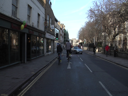

In [55]:
im=random.choice(glob.glob('/root/.fastai/data/camvid_tiny/images/*.*'))
Image.open(im)


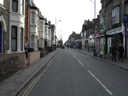

In [56]:
im='/root/.fastai/data/camvid_tiny/images/Seq05VD_f00810.png'
Image.open(im)


In [57]:
ls /root/.fastai/data/camvid_tiny/labels

0001TP_006750_P.png  0016E5_01500_P.png  0016E5_08550_P.png
0001TP_006840_P.png  0016E5_01920_P.png  Seq05VD_f00000_P.png
0001TP_007500_P.png  0016E5_02250_P.png  Seq05VD_f00090_P.png
0001TP_007860_P.png  0016E5_05190_P.png  Seq05VD_f00210_P.png
0001TP_008070_P.png  0016E5_05310_P.png  Seq05VD_f00420_P.png
0001TP_008160_P.png  0016E5_05730_P.png  Seq05VD_f00480_P.png
0001TP_008400_P.png  0016E5_05940_P.png  Seq05VD_f00810_P.png
0001TP_008580_P.png  0016E5_06090_P.png  Seq05VD_f00990_P.png
0001TP_008670_P.png  0016E5_06240_P.png  Seq05VD_f01080_P.png
0001TP_008700_P.png  0016E5_06300_P.png  Seq05VD_f01260_P.png
0001TP_008760_P.png  0016E5_06570_P.png  Seq05VD_f01320_P.png
0001TP_008940_P.png  0016E5_06810_P.png  Seq05VD_f01440_P.png
0001TP_009000_P.png  0016E5_06870_P.png  Seq05VD_f01830_P.png
0001TP_009150_P.png  0016E5_06990_P.png  Seq05VD_f01890_P.png
0001TP_009360_P.png  0016E5_07290_P.png  Seq05VD_f01950_P.png
0001TP_009840_P.png  0016E5_07973_P.png  Seq05VD_f02070_P.png
0001TP_009

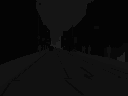

In [64]:
im=random.choice(glob.glob('/root/.fastai/data/camvid_tiny/labels/*.*'))
Image.open(im)


In [68]:
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames=get_image_files(path/'images'),
    label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str)
)

In [69]:
learn=unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.796668,2.209120,00:03


epoch,train_loss,valid_loss,time
0,1.629157,1.924016,00:01
1,1.444792,1.246758,00:01
2,1.373009,1.283438,00:01
3,1.275584,1.117049,00:01
4,1.156977,1.019235,00:01
5,1.054708,0.937462,00:01
6,0.965107,0.902385,00:01
7,0.895504,0.909609,00:01


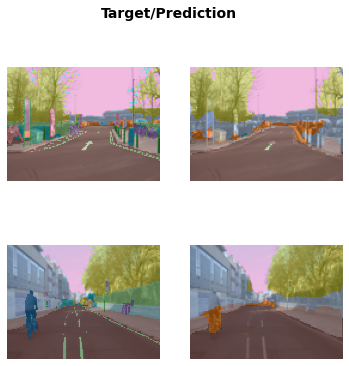

In [70]:
learn.show_results()

In [71]:
from fastai2.text.all import *

In [72]:
path=untar_data(URLs.IMDB)

In [75]:
path

Path('/root/.fastai/data/imdb')

In [76]:
ls /root/.fastai/data/imdb

imdb.vocab  README  test/  tmp_clas/  tmp_lm/  train/  unsup/


In [77]:
ls /root/.fastai/data/imdb/train

labeledBow.feat  neg/  pos/  unsupBow.feat


In [78]:
ls /root/.fastai/data/imdb/train/pos

0_9.txt       11876_10.txt  2501_8.txt   4377_10.txt  625_10.txt   8127_8.txt
10000_8.txt   11877_10.txt  2502_8.txt   4378_9.txt   6251_7.txt   8128_10.txt
10001_10.txt  11878_10.txt  2503_10.txt  4379_8.txt   6252_10.txt  8129_9.txt
10002_7.txt   11879_10.txt  2504_10.txt  437_9.txt    6253_8.txt   8130_10.txt
10003_8.txt   11880_10.txt  2505_9.txt   4380_8.txt   6254_10.txt  813_10.txt
10004_8.txt   11881_9.txt   2506_9.txt   4381_10.txt  6255_8.txt   8131_8.txt
10005_7.txt   11882_8.txt   2507_7.txt   4382_8.txt   6256_8.txt   8132_10.txt
10006_7.txt   11883_8.txt   250_7.txt    4383_9.txt   6257_10.txt  8133_7.txt
10007_7.txt   11884_8.txt   2508_10.txt  4384_10.txt  6258_8.txt   8134_10.txt
10008_7.txt   11885_7.txt   2509_9.txt   4385_9.txt   6259_8.txt   8135_10.txt
1000_8.txt    11886_10.txt  2510_10.txt  4386_9.txt   6260_10.txt  8136_9.txt
10009_9.txt   11887_8.txt   251_10.txt   4387_9.txt   6261_8.txt   8137_10.txt
10010_7.txt   11888_9.txt   2511_10.txt  4388_9.txt   6262

In [82]:
txt=random.choice(glob.glob('/root/.fastai/data/imdb/train/pos/*.txt'))
with open(txt) as f:
    print(f.read())

I saw ZP when it was first released and found it a major disappointment. Its script seemed forced and arch and too fakey '60s. It's politics too upfront and ridiculous. And let's face it, I was still under a love-spell known as BLOWUP : and I still haven't completely shaken it. Now the "love" is twisted up with all sorts of nostalgia it evokes and, oh well . . . Good Luck to me!<br /><br />But time marches on and time has been kind to ZP and time has been a teacher to me. I revisit this film about every ten years and it just gets better and better with age. And ZP is it's own "experience"and is only really linked to BLOWUP through its creator, the late,great Mr. Antonioni.<br /><br />Twelve years ago, I had the great good fortune to see an absolutely pristine print, projected at its correct size (immense), restored by an Italian government cultural agency who knows a good work of art when they see it and knows the importance of keeping such a thing of beauty in good shape. To this day 

In [83]:
dls=TextDataLoaders.from_folder(
    path,
    valid='test'
)

In [93]:
AWD_LSTM?

In [84]:
learn=text_classifier_learner(dls,
                              AWD_LSTM,
                              drop_mult=0.5,
                              metrics=accuracy)

In [85]:
learn.fine_tune(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.596097,0.385341,0.830440,03:42


epoch,train_loss,valid_loss,accuracy,time
0,0.288615,0.230301,0.906680,07:07


In [86]:
learn.predict('this was not a bad movie')

('neg', tensor(0), tensor([0.9961, 0.0039]))

In [88]:
learn.predict('definitelly it was not a bad movie')

('neg', tensor(0), tensor([0.9697, 0.0303]))

In [89]:
learn.predict('it was not a great movie')

('pos', tensor(1), tensor([0.1011, 0.8989]))

In [90]:
learn.predict('I did not like it')

('pos', tensor(1), tensor([0.3850, 0.6150]))

In [91]:
learn.predict('I liked it')

('pos', tensor(1), tensor([0.0411, 0.9589]))

In [94]:
from fastai2.tabular.all import *
path=untar_data(URLs.ADULT_SAMPLE)

In [96]:
dls=TabularDataLoaders.from_csv(
    path/'adult.csv',
    path=path,
    y_names='salary',
    cat_names=['workclass','education','marital-status','occupation',
               'relationship','race'],
    cont_names=['age','fnlwgt','education-num'],
    procs=[Categorify,FillMissing,Normalize]

)

In [97]:
learn=tabular_learner(dls, metrics=accuracy)

In [98]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.371840,0.366652,0.835381,00:05
1,0.353417,0.354742,0.842905,00:05
2,0.346679,0.354986,0.838298,00:05


In [99]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,10.0,5.0,13.0,2.0,5.0,1.0,-1.141741,-0.542944,1.141889,0.0,0.0
1,5.0,12.0,7.0,13.0,2.0,5.0,1.0,1.054127,-0.264536,-0.424342,0.0,0.0
2,5.0,16.0,1.0,5.0,2.0,3.0,1.0,0.322171,-0.681935,-0.032784,0.0,0.0
3,5.0,12.0,4.0,15.0,5.0,3.0,1.0,0.175780,0.475670,-0.424342,0.0,0.0
4,3.0,8.0,3.0,12.0,1.0,5.0,1.0,-0.482980,-1.613326,0.750332,1.0,0.0
5,5.0,16.0,3.0,5.0,1.0,5.0,1.0,1.054127,-0.886211,-0.032784,0.0,1.0
6,5.0,6.0,5.0,9.0,5.0,4.0,1.0,-0.922154,0.678098,-2.382130,0.0,0.0
7,1.0,10.0,3.0,1.0,1.0,5.0,1.0,1.493301,1.689589,1.141889,0.0,1.0
8,3.0,12.0,3.0,5.0,1.0,5.0,1.0,0.322171,0.419137,-0.424342,1.0,1.0


In [100]:
from fastai2.collab import *

In [101]:
path=untar_data(URLs.ML_SAMPLE)

In [102]:
dls=CollabDataLoaders.from_csv(path/'ratings.csv')

In [105]:
dls.train_ds

      userId  movieId  rating   timestamp
2123      82       20     3.0   974713872
3987      28       90     3.5  1462634082
1748      67       44     2.0  1296195864
3125      53       78     2.0  1030322959
4161      74       41     5.0   853892867
...      ...      ...     ...         ...
82        33       57     4.5  1094223871
4522      99      100     4.5  1343731689
4915      17       30     5.0  1049683603
1334       3       16     5.0   855191226
919       38       72     4.5  1140051202

[4825 rows x 4 columns]

In [106]:
pd.read_csv(path/'ratings.csv')

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234
...,...,...,...,...
6026,384,377,4.0,1153501701
6027,262,587,1.5,1434024940
6028,580,153,2.0,1165899265
6029,585,1,4.0,974607482


In [108]:
learn=collab_learner(dls,
                     y_range=(0.5, 5.5))

In [109]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.497465,1.473323,00:00


epoch,train_loss,valid_loss,time
0,1.348377,1.415155,00:00
1,1.257565,1.231066,00:00
2,1.023520,0.907420,00:00
3,0.800476,0.744860,00:00
4,0.699768,0.699720,00:00
5,0.651043,0.686373,00:00
6,0.616098,0.678742,00:00
7,0.614187,0.675892,00:00
8,0.602385,0.674433,00:00
9,0.598077,0.674306,00:00


In [110]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,38.0,96.0,4.5,4.052419
1,96.0,74.0,3.0,3.249520
2,46.0,10.0,1.5,2.620805
3,24.0,85.0,4.0,3.816208
4,99.0,63.0,4.5,4.593878
5,48.0,23.0,3.0,3.129735
6,5.0,28.0,4.0,3.536836
7,42.0,76.0,4.0,3.402466
8,67.0,69.0,3.0,3.457398


### Some non-imagery ideas
Plagiarism detection: Create a 'picture' of each document based on their conversion into vectors. Next, I would extract theif features and group them by their similarity. Plagiarized documents would have very similar vectors. 